In [23]:
import pandas as pd
from pathlib import Path
from matplotlib import pyplot as plt
expdir = "/homes_unix/jlegrand/data/Memento/output/prediction"
exppath = Path(expdir) / "k-3_feat-series_atlas-schaefer200_winsize-24_batchsize-64_niter-10_stamp-2024-07-25-15:55_scaling-True"

cv_results = pd.read_csv(Path(exppath) / "cv_results.csv", index_col=0)

In [24]:
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_module__channel_func,param_module__num_conv_blocks,param_module__num_fc_blocks,param_optimizer__lr,param_optimizer__weight_decay,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
2,76.016493,11.481889,0.875439,0.457906,<function slow_increase at 0x7f80435467a0>,2,2,0.001243,0.004122,OrderedDict({'module__channel_func': 'slow_inc...,0.345397,0.343149,0.349207,0.329149,0.330352,0.339451,0.008163,1
4,77.108307,8.932250,0.982989,0.491993,<function default_channel_func at 0x7f80435468e0>,3,1,0.000052,0.039131,OrderedDict({'module__channel_func': <function...,0.325215,0.351854,0.359510,0.295728,0.326386,0.331739,0.022556,2
3,73.144016,10.150125,1.094418,0.550006,<function default_channel_func at 0x7f80435468e0>,3,1,0.000103,0.003136,OrderedDict({'module__channel_func': <function...,0.321441,0.348018,0.377647,0.279823,0.314607,0.328307,0.032889,3
8,100.347757,11.244944,1.069869,0.599049,<function initial_bump at 0x7f80434fd800>,4,2,0.000374,0.000034,OrderedDict({'module__channel_func': <function...,0.336597,0.334723,0.346999,0.282833,0.328011,0.325833,0.022346,4
7,134.572082,8.786488,1.215217,0.710083,<function fast_increase at 0x7f8043546840>,4,1,0.000638,0.000231,OrderedDict({'module__channel_func': <function...,0.325178,0.274806,0.327527,0.344957,0.335429,0.321580,0.024390,5
9,76.149427,21.085834,0.964914,0.537397,<function fast_increase at 0x7f8043546840>,3,1,0.005527,0.001979,OrderedDict({'module__channel_func': <function...,0.315563,0.297752,0.302571,0.356772,0.261233,0.306778,0.030822,6
6,93.653814,22.462481,1.569735,0.820062,<function default_channel_func at 0x7f80435468e0>,2,1,0.036413,0.000018,OrderedDict({'module__channel_func': <function...,0.349746,0.257346,0.276126,0.319831,0.277839,0.296178,0.033691,7
0,95.245603,11.846506,1.165933,0.603587,<function default_channel_func at 0x7f80435468e0>,4,2,0.000082,0.010711,OrderedDict({'module__channel_func': <function...,0.328625,0.324777,0.376207,0.187281,0.256964,0.294771,0.065821,8
5,65.965782,11.086277,0.811852,0.347283,<function fast_increase at 0x7f8043546840>,2,1,0.060689,0.000902,OrderedDict({'module__channel_func': <function...,0.229409,0.237147,0.243958,0.298436,0.284820,0.258754,0.027572,9
1,104.172058,20.507785,1.132036,0.572753,<function initial_bump at 0x7f80434fd800>,4,2,0.088453,0.020888,OrderedDict({'module__channel_func': <function...,0.153825,0.220491,0.216401,0.213486,0.171047,0.195050,0.027272,10


Batch size is not so important, set around 200?


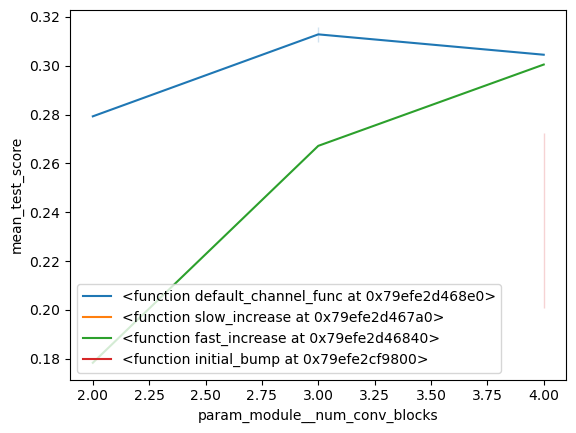

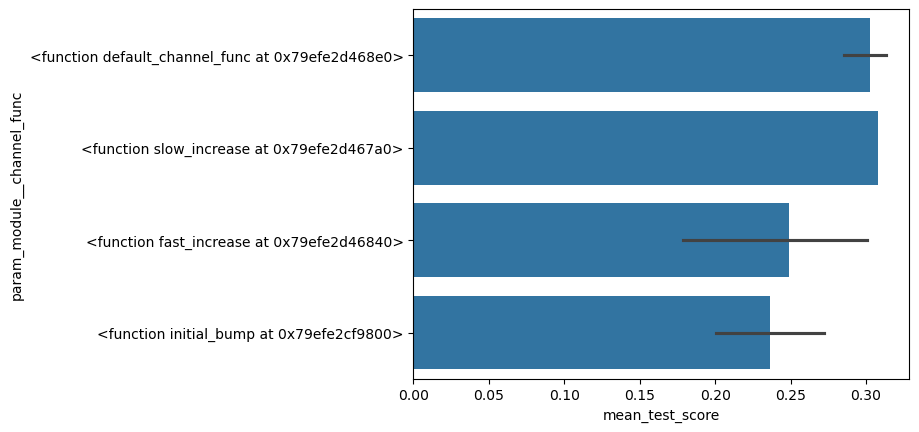

In [21]:
import seaborn as sns
sns.lineplot(cv_results, x="param_module__num_conv_blocks", y="mean_test_score", hue="param_module__channel_func")
plt.legend(loc="lower left")
plt.show()
sns.barplot(cv_results, y="param_module__channel_func", x="mean_test_score")
plt.show()

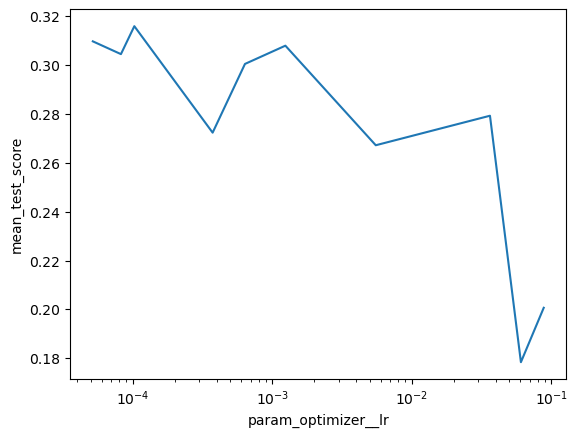

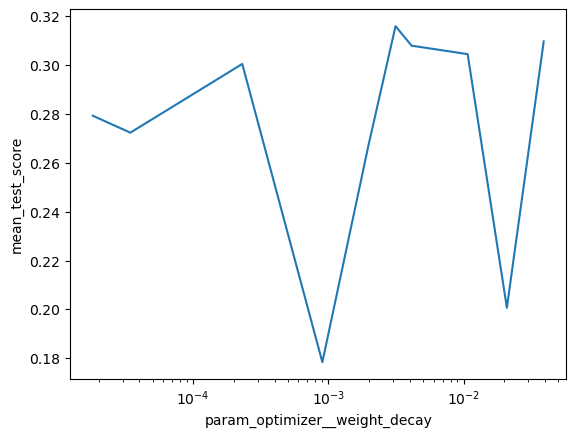

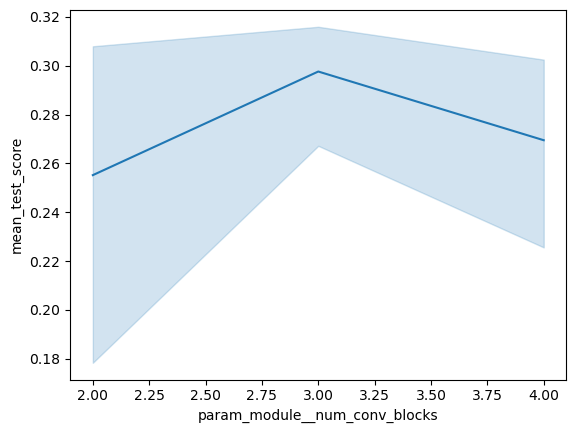

In [22]:
#sns.barplot(cv_results, y="param_module__channel_func", x="mean_test_score")
#plt.show()
g = sns.lineplot(cv_results, x="param_optimizer__lr", y="mean_test_score")
g.set(xscale='log')
plt.show()
g = sns.lineplot(cv_results, x="param_optimizer__weight_decay", y="mean_test_score")
g.set(xscale='log')
plt.show()
g = sns.lineplot(cv_results, x="param_module__num_conv_blocks", y="mean_test_score")
plt.show()